In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#df_1 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-2060.csv")
df_1 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-370.csv")
df_1.head()

,id,timestamp,lat,long,alt,speed
0,370,2024-06-03 09:56:14.045042,279.081177,1.968258,0.001837,8.077202
1,370,2024-06-03 09:56:21.799659,316.466034,1.983985,0.001843,8.064644
2,370,2024-06-03 09:56:29.500683,355.218384,2.005326,0.001844,8.047974
3,370,2024-06-03 09:56:37.231342,391.564453,5.787290,0.000256,8.036221
4,370,2024-06-03 09:56:44.947662,392.337952,44.118767,0.001527,9.937590


In [4]:
df_1.describe()

,id,lat,long,alt,speed
count,102.0,102.000000,102.000000,102.000000,1.020000e+02
mean,370.0,210.978458,281.534464,0.001647,2.617426e+00
std,0.0,133.330631,94.389768,0.000350,4.942870e+00
min,370.0,92.420982,1.968258,0.000256,0.000000e+00
25%,370.0,92.428741,310.147339,0.001678,6.484048e-08
50%,370.0,92.477570,310.422913,0.001678,2.908709e-07
75%,370.0,365.897644,326.592201,0.001690,3.388635e+00
max,370.0,392.347412,326.611023,0.002508,2.430139e+01


## print car velocity at each point of the map

<AxesSubplot:xlabel='long', ylabel='lat'>

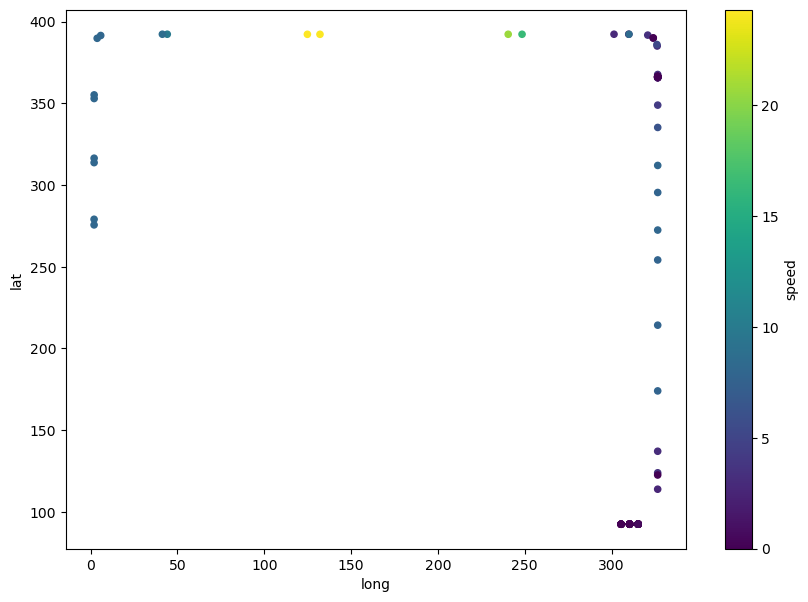

In [5]:
df_1.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [6]:
df_2 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-1297.csv")
df_2.head()

,id,timestamp,lat,long,alt,speed
0,1297,2024-06-03 11:53:30.303280,273.178619,1.967366,0.001836,8.060169
1,1297,2024-06-03 11:53:38.170447,307.826569,1.979506,0.001843,8.049557
2,1297,2024-06-03 11:53:45.908071,345.451080,2.000848,0.001843,8.065278
3,1297,2024-06-03 11:53:53.768775,383.047974,2.144311,0.001770,7.628394
4,1297,2024-06-03 11:54:01.590533,392.353912,33.086845,0.001846,8.058672


In [7]:
df_2.describe()

,id,lat,long,alt,speed
count,96.0,96.000000,96.000000,96.000000,9.600000e+01
mean,1297.0,223.192497,198.234051,0.001730,3.133250e+00
std,0.0,119.242226,72.220298,0.000206,4.731927e+00
min,1297.0,92.235153,1.967366,0.000316,0.000000e+00
25%,1297.0,101.262779,178.216064,0.001678,7.395657e-08
50%,1297.0,212.605835,195.220901,0.001680,6.264348e-07
75%,1297.0,338.743477,195.842514,0.001843,8.047938e+00
max,1297.0,392.353912,326.606628,0.002541,2.418966e+01


## print car velocity at each point of the map (CAR2)

<AxesSubplot:xlabel='long', ylabel='lat'>

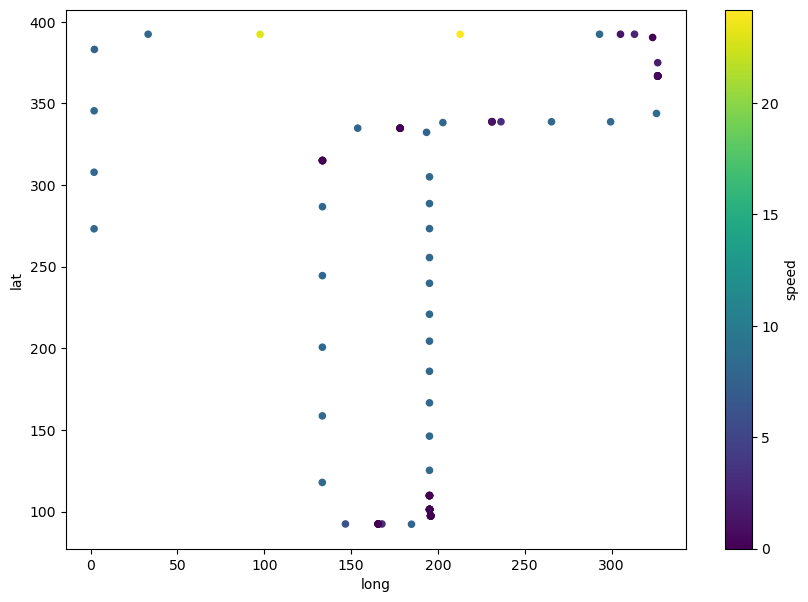

In [8]:
df_2.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [9]:
df = pd.concat([df_1, df_2])

In [10]:
df.head()

,id,timestamp,lat,long,alt,speed
0,370,2024-06-03 09:56:14.045042,279.081177,1.968258,0.001837,8.077202
1,370,2024-06-03 09:56:21.799659,316.466034,1.983985,0.001843,8.064644
2,370,2024-06-03 09:56:29.500683,355.218384,2.005326,0.001844,8.047974
3,370,2024-06-03 09:56:37.231342,391.564453,5.787290,0.000256,8.036221
4,370,2024-06-03 09:56:44.947662,392.337952,44.118767,0.001527,9.937590


## print 2 cars trajectories, color by car

<AxesSubplot:xlabel='long', ylabel='lat'>

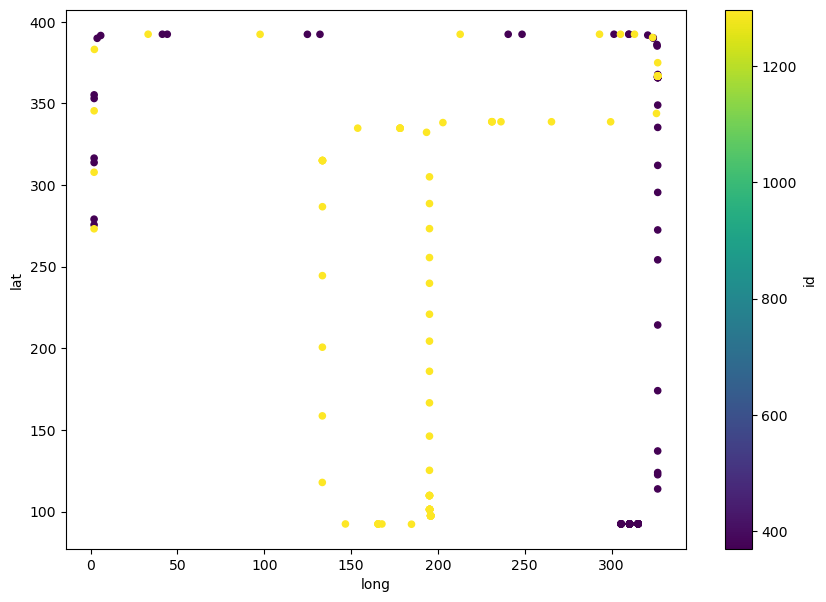

In [11]:
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## print 2 cars trajectories, color by timestamp

In [12]:
# df.plot.scatter(x="long",y="lat", c='timestamp', colormap='viridis', figsize=(10,7))

## Add car 3

<AxesSubplot:xlabel='long', ylabel='lat'>

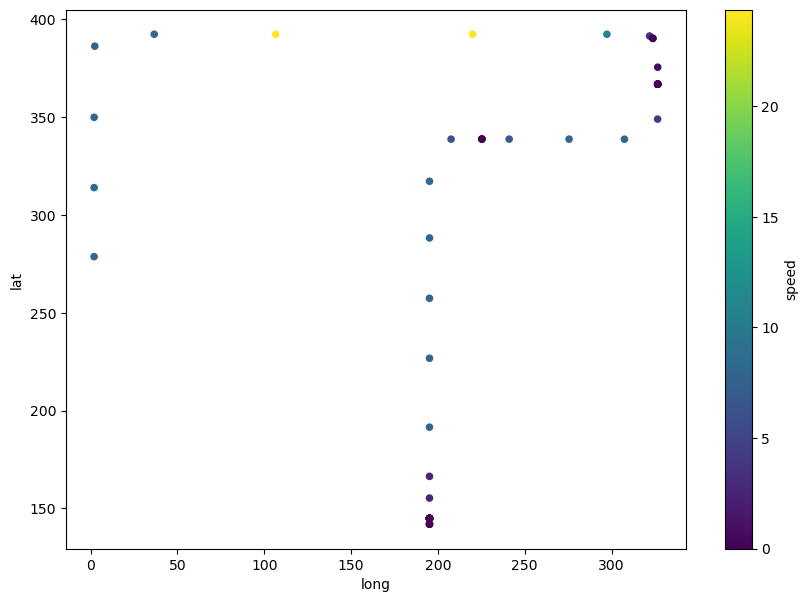

In [13]:
df_3 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-2688.csv")
df_3.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

## print trajectories of the 3 cars

<AxesSubplot:xlabel='long', ylabel='lat'>

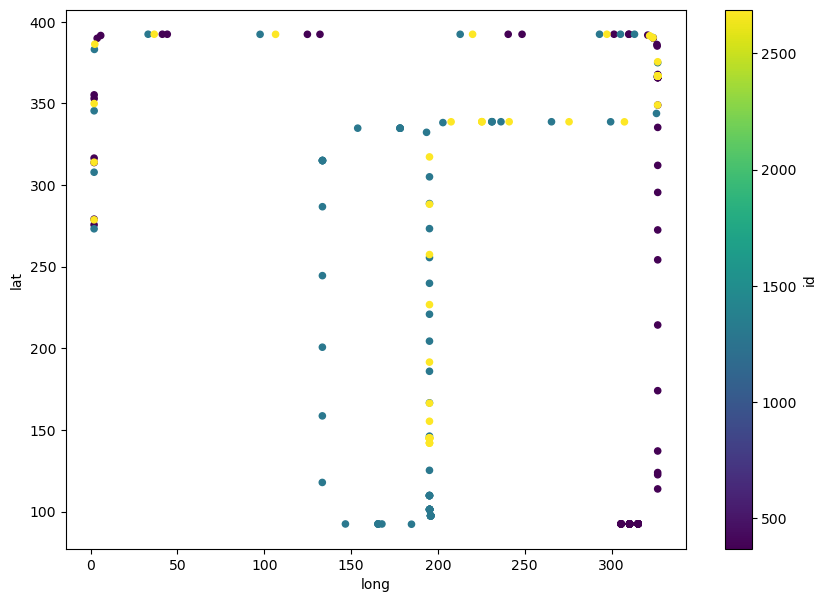

In [14]:
df = pd.concat([df, df_3])
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## Plot trajectories on top of the map
### color = speed

In [15]:
df.loc[df['lat'] <= 5, 'lat'] = 8

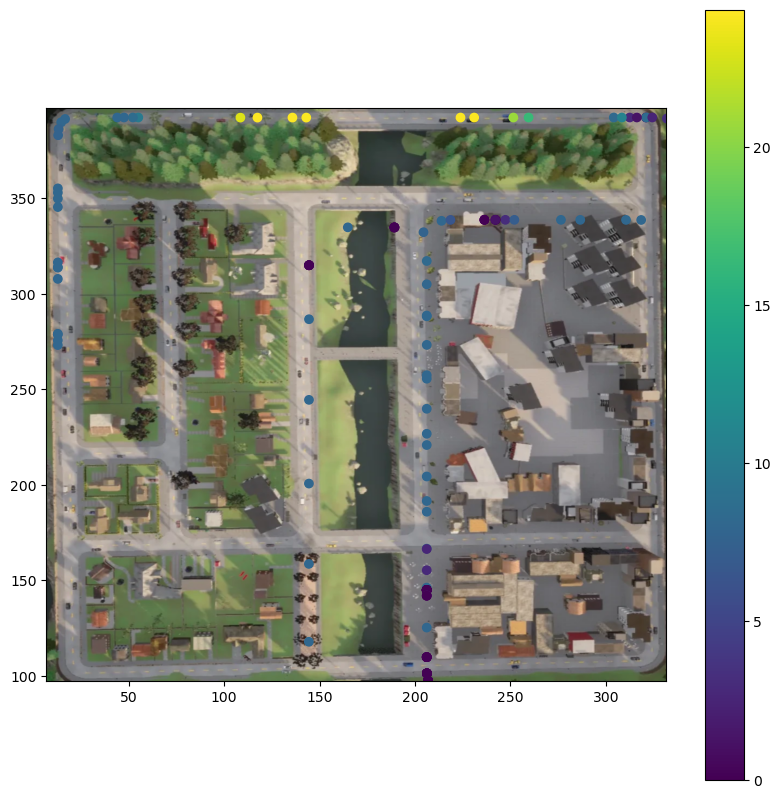

In [19]:
import matplotlib.cm as cm
import numpy as np

# tailored_extent = [df.long.min()-0.0002,
#                    df.long.max() + 0.0002,
#                    df.lat.min()-0.00026,
#                    df.lat.max() + 0.00026]

tailored_extent = [df.long.min()+5,
                   df.long.max()+5,
                   df.lat.min()+5,
                   df.lat.max()+5]

#colors = cm.rainbow(np.linspace(0, 1, 10))
# colors = cm.viridis(np.linspace(0, 8.5, 732))

img = plt.imread("town01aerial_croped.webp")
plt.figure(figsize=(10,10))
#plt.scatter(df.long.values*2,df.lat.values*2,c=df.speed, zorder=1)
plt.scatter(df.long.values+11,df.lat.values,c=df.speed, zorder=1)
plt.colorbar()
plt.imshow(img, zorder=0, extent=tailored_extent);

In [17]:
df

,id,timestamp,lat,long,alt,speed
0,370,2024-06-03 09:56:14.045042,279.081177,1.968258,0.001837,8.077202e+00
1,370,2024-06-03 09:56:21.799659,316.466034,1.983985,0.001843,8.064644e+00
2,370,2024-06-03 09:56:29.500683,355.218384,2.005326,0.001844,8.047974e+00
3,370,2024-06-03 09:56:37.231342,391.564453,5.787290,0.000256,8.036221e+00
4,370,2024-06-03 09:56:44.947662,392.337952,44.118767,0.001527,9.937590e+00
...,...,...,...,...,...,...
48,2688,2024-06-03 12:34:50.529587,144.913391,195.144196,0.001679,7.536920e-08
49,2688,2024-06-03 12:34:58.910362,144.913391,195.144196,0.001679,9.940102e-09
50,2688,2024-06-03 12:35:07.308102,142.035461,195.144058,0.001917,2.191982e+00
51,2688,2024-06-03 12:35:15.444161,141.930969,195.144043,0.001788,0.000000e+00


In [18]:
df.speed.mean()

3.0004709973981663